In [113]:
import numpy as np
from scipy.stats import norm, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import trange, tqdm

In [116]:
def session_duration(size, effect=0, seed=None):
    def _user_sessions(mean):
        size = np.random.randint(3,10)
        duration = np.random.normal(loc=mean, scale=10, size=size)
        duration = np.where(duration > 0, duration, 0)
        return duration

    if seed:
        np.random.seed(seed)

    mean_durations = np.random.normal(loc=100, scale=20, size=size) * (1 + effect)
    return [_user_sessions(mean) for mean in mean_durations]

In [117]:
def linearization(a, b):
    a_x = np.array([np.sum(row) for row in a])
    a_y = np.array([len(row) for row in a])
    b_x = np.array([np.sum(row) for row in b])
    b_y = np.array([len(row) for row in b])
    coef = np.sum(a_x) / np.sum(a_y)
    
    a_lin = a_x - coef * a_y
    b_lin = b_x - coef * b_y

    return a_lin, b_lin

In [111]:
def plot_pvalue_ecdf(p_values, title = None, vline = None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if title:
            plt.suptitle(title)

    sns.histplot(p_values, ax=ax1, bins=20, stat='density')
    ax1.plot([0,1],[1,1], 'k--')
    ax1.set(xlabel='p-value', ylabel='Density')

    sns.ecdfplot(p_values, ax=ax2)
    ax2.plot([0,1],[0,1], 'k--')
    ax2.set(xlabel='p-value', ylabel='Probability')

    if vline is not None:
        ax2.axvline(vline, color='red', linestyle='--', linewidth=1, label=f'α = {vline}')
        
        ecdf_value = np.mean(np.array(p_values) <= vline)
        
        ax2.axhline(ecdf_value, color='green', linestyle='--', linewidth=1, 
                    label=f'ECDF = {ecdf_value:.3f}')
        
        ax2.legend()
    
    plt.tight_layout()

  0%|          | 0/5000 [00:00<?, ?it/s]

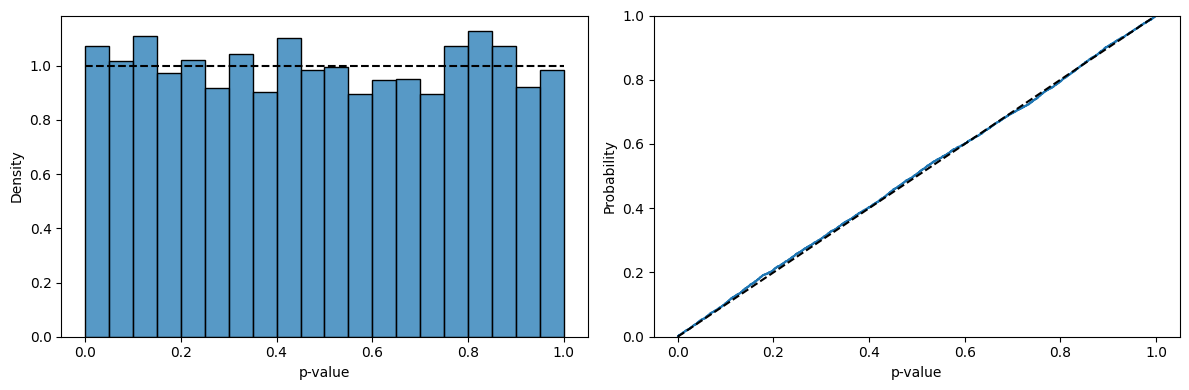

In [154]:
N = 1000
effect = 0

p_values = []
for _ in trange(5000):
    a = session_duration(N)
    b = session_duration(N, effect)
    a_lin, b_lin = linearization(a, b)
    _, p_value = ttest_ind(a_lin, b_lin)
    p_values.append(p_value)

plot_pvalue_ecdf(p_values)

  0%|          | 0/5000 [00:00<?, ?it/s]

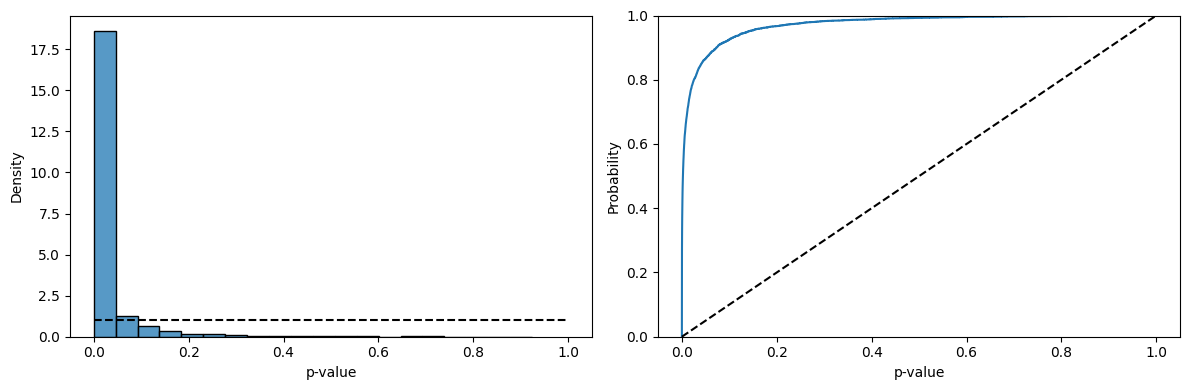

In [153]:
N = 1000
effect = 0.03

p_values = []
for _ in trange(5000):
    a = session_duration(N)
    b = session_duration(N, effect)
    a_lin, b_lin = linearization(a, b)
    _, p_value = ttest_ind(a_lin, b_lin)
    p_values.append(p_value)

plot_pvalue_ecdf(p_values)